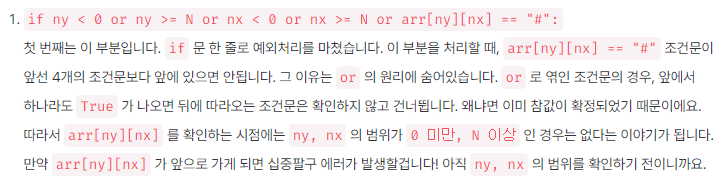

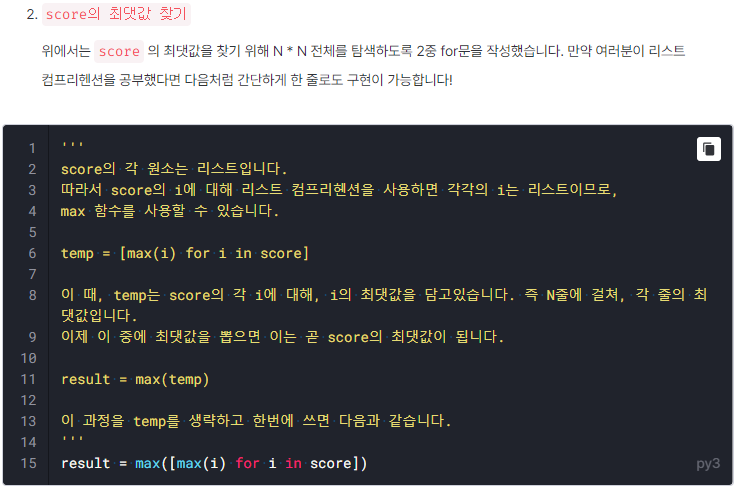

In [ ]:
# Error Code
scoremap = scoremap[1:N+1][1:N+1]

real = []
for a in range(0,N):
	for b in range(0,N):
		real.append(int(scoremap[a][b]))

print(max(real))

4 4
0 0 @ 0
0 0 0 0
0 # 0 0
0 0 0 @


In [ ]:
# Revised Code
N, K = map(int, input().split())
bombmap = []
zero = list('0' * (N+2))
bombmap.append(zero)
for i in range(N):
    onerow = ['0'] + input().split() + ['0']
    bombmap.append(onerow)
bombmap.append(zero)

r = 0
c = 0

def score(scr):
    if scr.isdigit():
        return 1
    if scr == '#':
        return 0
    if scr == '@':
        return 2

scoremap = []
for h in range(N+2):
    k = list('0' * (N+2))
    scoremap.append(k)

for k in range(K):
    r, c = map(int, input().split())
    scoremap[r-1][c] = str(int(scoremap[r-1][c]) + score(bombmap[r-1][c]))
    scoremap[r][c-1] = str(int(scoremap[r][c-1]) + score(bombmap[r][c-1]))
    scoremap[r][c] = str(int(scoremap[r][c]) + score(bombmap[r][c]))
    scoremap[r][c+1] = str(int(scoremap[r][c+1]) + score(bombmap[r][c+1]))
    scoremap[r+1][c] = str(int(scoremap[r+1][c]) + score(bombmap[r+1][c]))

# Corrected line to create a submatrix
# The indices 1 to N are selected for both rows and columns.
scoremap = [row[1:N+1] for row in scoremap[1:N+1]]

real = []
for a in range(N):
    for b in range(N):
        real.append(int(scoremap[a][b]))

print(max(real))

In [ ]:
# Answer Code
N, K = map(int, input().split())
arr = [list(input().split()) for _ in range(N)]
score = [[0] * N for _ in range(N)]

dy = [0, 1, -1, 0, 0]
dx = [0, 0, 0, 1, -1]

for _ in range(K):
	y, x = map(int, input().split())
	y -= 1
	x -= 1

	for k in range(5):
		ny = y + dy[k]
		nx = x + dx[k]

		if ny < 0 or ny >= N or nx < 0 or nx >= N or arr[ny][nx] == "#":
			continue

		if arr[ny][nx] == "@":
			score[ny][nx] += 2
		else:
			score[ny][nx] += 1

result = 0

for i in range(N):
	for j in range(N):
		result = max(result, score[i][j])

print(result)

> result = max(result, score[i][j])

-  여기서 result는 현재까지 찾아낸 가장 큰 값이 저장되는 변수
- 이중 반복문을 통해 2차원 리스트 score의 각 원소에 접근하고, 현재까지 찾아낸 가장 큰 값인 result와 현재 위치의 값인 score[i][j]를 비교합니다. max(result, score[i][j])는 두 값 중에서 더 큰 값을 선택하여 result에 저장합니다. 이 과정을 모든 원소에 대해 반복하면, result에는 score에서 가장 큰 값이 저장되게 됩니다.

### 문제점 : matrix의 slicing


```python
scoremap = scoremap[1:N+1][1:N+1]
```
> scoremap[1:N+1]: This slices the rows from index 1 to N (both inclusive) in the outer list (dimension 1). It extracts a sublist containing the desired rows.

> [1:N+1] applied to the result of the first slice: This tries to slice each row in the sublist obtained in the first step, keeping only elements from index 1 to N (both inclusive) in each row. However, due to how Python handles this type of slicing, it doesn't work as expected for multidimensional lists.

- 이 코드를 사용해서 matrix를 slicing하려 했다.
- index가 1인 행부터 N까지인 행을 고르고 그 다음, index가 1인 행부터 N까지인 열을 고르려고 한 것이었다.
- 그러나, 파이썬은 행을 고르고 그 결과로 이루어진 matrix의 행을 또 고른다. 아래의 코드를 보면 이해가 갈 것이다.

```python
b = [[1,2],[3,4,5],[6,7,8,9],[1,4,7,8],[3,7,6,5,]]
b = b[2:4][0:2]
print(b)
# [[6, 7, 8, 9], [1, 4, 7, 8]]
```

The reason the line scoremap = scoremap[1:N+1][1:N+1] is not working as expected is due to the way Python handles list slicing. When you use two slices consecutively like this, it first slices the rows with [1:N+1] and then attempts to slice the resulting list with [1:N+1] again. This is not the correct way to extract a submatrix from a 2D list.

In Python, you should use list comprehension to create a new 2D list that contains the desired submatrix. The corrected line is:

```python
scoremap = [row[1:N+1] for row in scoremap[1:N+1]]
```
This line iterates through each row in scoremap[1:N+1] and creates a new list with elements from index 1 to N. This correctly extracts the submatrix.

I apologize for any confusion caused by the incorrect explanation in my previous responses. I appreciate your patience, and I hope this clarification helps.

-  It creates a new list by iterating through each row in the sliced list and selecting the elements from index 1 to N, effectively extracting the desired submatrix.

> 1. scoremap[1:N+1]: This part extracts the submatrix consisting of rows from index 1 to N (both inclusive). Each element of this submatrix is a list representing a row.
2. row[1:N+1] for row in scoremap[1:N+1]: This is a list comprehension that iterates over each row in the submatrix obtained in step 1. For each row, it selects elements from index 1 to N (both inclusive), effectively creating a new list representing a row without the first and last elements.
- So, after this line, scoremap is assigned a list of lists, where each sublist represents a row of the desired submatrix without the outermost layer of zeros.

In [ ]:
a = [[1,2],[3, 4]]
a[1][1] = 5
print(a)

[[1, 2], [3, 5]]


### **문자 판별 isalpha()**
```python
name = 'Tom'
print(name.isalpha())
# True
```
### **숫자 판별 isdigit()**
```python
name = '2425'
print(name.isdigit())
# True
```

### **isdecimal()**
-  isdigit() 함수는 단일 글자가 '숫자' 모양으로 생겼으면 무조건 True를 반환하는 함수. 즉, 숫자처럼 생긴 '모든 글자'를 숫자로 친다.
그에 비해 isdecimal() 함수는 주어진 문자열이 int형으로 변환이 가능한지 알아내는 함수이기 때문에 특수문자 중 숫자모양을 숫자로 치지않는다.
- isnumeric() 함수는 숫자값 표현에 해당하는 문자열까지 인정한다. 제곱근 및 분수, 거듭제곱 특수문자도 isnumeric() 함수는 True를 반환하는 것을 알 수 있다.
